# Week4授業前課題2 住宅価格の予測

## 今回使う手法の一覧
scikit-laernを使い以下の手法で学習と推定を行っていきます。それぞれの手法についての詳細は今の段階では扱いません。ライブラリを使えばどれも気軽に利用できることや、手法毎の結果に違いがあることを簡単に見ていきます。


線形回帰
SVM
決定木
ランダムフォレスト

分類問題と回帰問題の両方で使える手法と、そうではない手法が存在します。

## 4.回帰問題の流れ

回帰問題の流れは分類問題と基本的には同じですから、課題1のように細かい説明は行いません。


練習のための準備
このデータセットには79種類の特徴量（目的変数）がありますが、Week3で探索して分かったように様々なタイプのデータ含まれています。これをどう前処理するかということは機械学習において重要な箇所ですが、今回は回帰問題の学習や評価の練習を優先するため、説GrLivAreaとYearBuiltの2つだけを利用することにします。



## 【問題1】練習のために特徴量の選択
データセットを読み込んだ後、GrLivAreaとYearBuiltを抜き出してください。

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

/Users/adachi-yuya/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [2]:
df = pd.read_csv("train.csv")
df = df.set_index("Id")
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
df = df.loc[:, ["GrLivArea", "YearBuilt", "SalePrice"]]
display(df.head())
display(df.shape)

,GrLivArea,YearBuilt,SalePrice
Id,,,
1,1710,2003,208500
2,1262,1976,181500
3,1786,2001,223500
4,1717,1915,140000
5,2198,2000,250000


(1460, 3)

## 【問題2】線形回帰による推定と評価
データを簡単に分析、前処理し、 線形回帰 による学習、推定、評価、可視化までの一連の流れを作成・実行してください。

## 評価指数について
回帰モデルの評価において、MSE(平均二乗誤差)とMAE(平均絶対誤差)とR2(決定係数)を採用する。
- MSEとMAEは値が0に近いほど予測精度が高いと判断できる。
- R2は1に近いほど、その分析手法が「正しい」と説明しやすくなる。説明力と言える。  
参考：https://funatsu-lab.github.io/open-course-ware/basic-theory/accuracy-index/

In [4]:
display(df.isnull().sum())              # 欠損値の確認
display(df.describe())                  # 統計値の確認
display(df.dtypes)                       # typeの確認

# 後の標準化のためfloat型に変換
df = df.astype('float')
df.info()

GrLivArea    0
YearBuilt    0
SalePrice    0
dtype: int64

,GrLivArea,YearBuilt,SalePrice
count,1460.000000,1460.000000,1460.000000
mean,1515.463699,1971.267808,180921.195890
std,525.480383,30.202904,79442.502883
min,334.000000,1872.000000,34900.000000
25%,1129.500000,1954.000000,129975.000000
50%,1464.000000,1973.000000,163000.000000
75%,1776.750000,2000.000000,214000.000000
max,5642.000000,2010.000000,755000.000000


GrLivArea    int64
YearBuilt    int64
SalePrice    int64
dtype: object

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 3 columns):
GrLivArea    1460 non-null float64
YearBuilt    1460 non-null float64
SalePrice    1460 non-null float64
dtypes: float64(3)
memory usage: 45.6 KB


In [5]:
# 訓練データと検証データに分割
from sklearn.model_selection import train_test_split

X = df.iloc[:, :2].values
y = df.iloc[:, 2].values

X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size=0.25, random_state=0)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
print(y)

(1095, 2)
(365, 2)
(1095,)
(365,)
[208500. 181500. 223500. ... 266500. 142125. 147500.]


In [6]:
# 標準化
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(X_train)   #後でスケーリングするために使用する平均と標準を計算します。
X_train_scaler = scaler.transform(X_train)   # 標準化　センタリングとスケーリングによって標準化を実行する
X_test_scaler = scaler.transform(X_test)     # 標準化　センタリングとスケーリングによって標準化を実行する

In [7]:
# グラフ化関数
def yyplot(y_test, y_pred, model):
    yvalues = np.concatenate([y_test.flatten(), y_pred.flatten()])
    ymin, ymax, yrange = np.amin(yvalues), np.amax(yvalues), np.ptp(yvalues)
    fig = plt.figure(figsize=(8, 8))
    plt.scatter(y_test, y_pred, label='MSE : %.3f, MAE : %.3f \n R2 = %.3f'%(
                mean_squared_error(y_test, y_pred), mean_absolute_error(y_test, y_pred),
                r2_score(y_test, y_pred)))
    plt.plot([ymin - yrange * 0.01, ymax + yrange * 0.01], [ymin - yrange * 0.01, ymax + yrange * 0.01])
    plt.xlim(ymin - yrange * 0.01, ymax + yrange * 0.01)
    plt.ylim(ymin - yrange * 0.01, ymax + yrange * 0.01)
    plt.xlabel('y_test', fontsize=24)
    plt.ylabel('y_predicted', fontsize=24)
    plt.title('Plot by {}'.format(model), fontsize=16)
    plt.tick_params(labelsize=16)
    plt.legend()
    plt.show()

    return fig

In [8]:
# 関数化する
def regression_analysis(scaler, X_train, X_test, y_train, y_test, model):
    scaler.fit(X_train)   #後でスケーリングするために使用する平均と標準を計算します。
    X_train_scaler = scaler.transform(X_train)   # 標準化　センタリングとスケーリングによって標準化を実行する
    X_test_scaler = scaler.transform(X_test)     # 標準化　センタリングとスケーリングによって標準化を実行する
    model.fit(X_train_scaler, y_train)
    y_pred = model.predict(X_test_scaler)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2s = r2_score(y_test, y_pred)
    
    print("MSE(平均二乗誤差):{}".format(mse))
    print("MAE(平均絶対誤差):{}".format(mae))
    print("R2(決定係数):{}".format(r2s))
    
    yyplot(y_test, y_pred, model)
          
    return [mse, mae, r2s]

MSE(平均二乗誤差):2725908099.063638
MAE(平均絶対誤差):31844.328697132216
R2(決定係数):0.5871035359601553


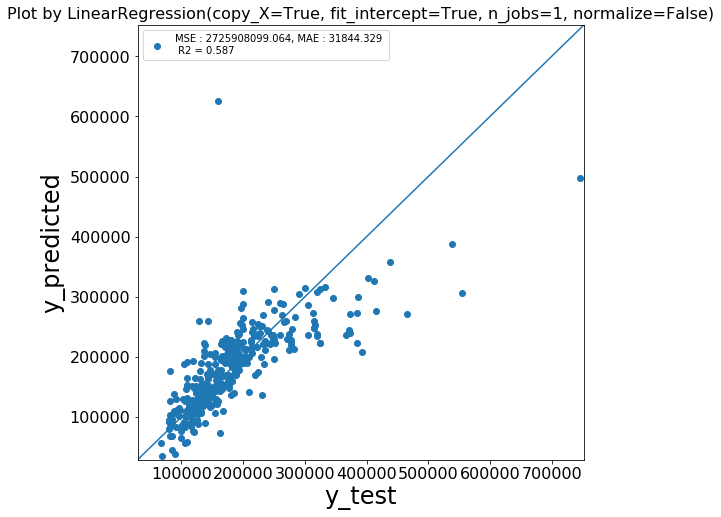

[2725908099.063638, 31844.328697132216, 0.5871035359601553]

In [9]:
# 線形回帰
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

# 上記関数で分析
regression_analysis(scaler, X_train, X_test, y_train, y_test, model=lr)

## 【問題3】手法の比較
以下の全ての手法について学習・推定・評価・可視化を行ってください。そして、指標値を１つの表にまとめてください。その表と可視化した図を利用して結果を簡単に考察してください。どの手法がどの指標値が良かったかや、どういった図になっていたかを述べてください。


線形回帰
SVM
決定木
ランダムフォレスト


▼LinearRegression
MSE(平均二乗誤差):2725908099.063638
MAE(平均絶対誤差):31844.328697132216
R2(決定係数):0.5871035359601553


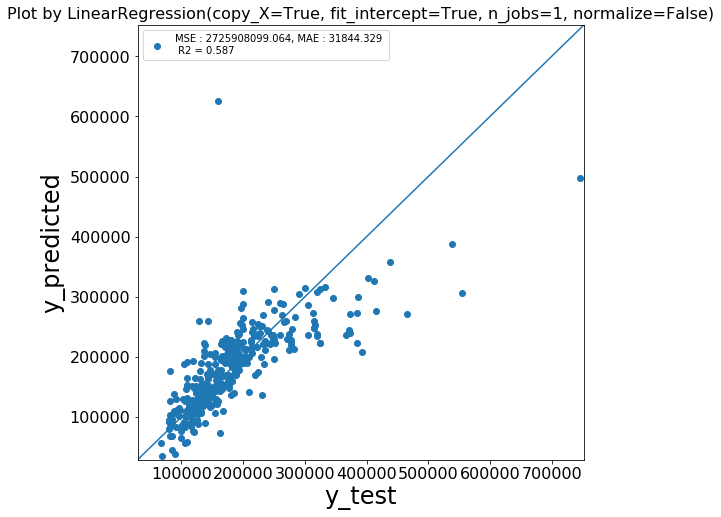

▼SVR
MSE(平均二乗誤差):6943346839.259772
MAE(平均絶対誤差):55097.00978181054
R2(決定係数):-0.051716805682986866


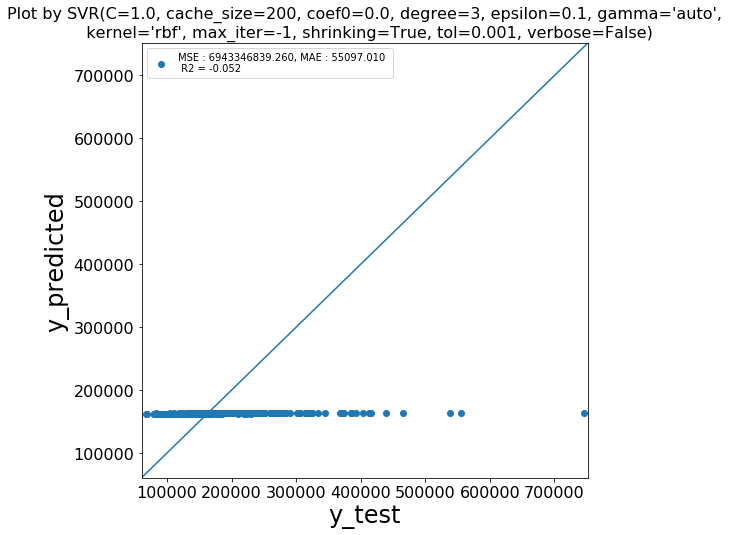

▼DecisionTreeRegressor
MSE(平均二乗誤差):2849243097.084323
MAE(平均絶対誤差):35739.09406392694
R2(決定係数):0.5684218406408614


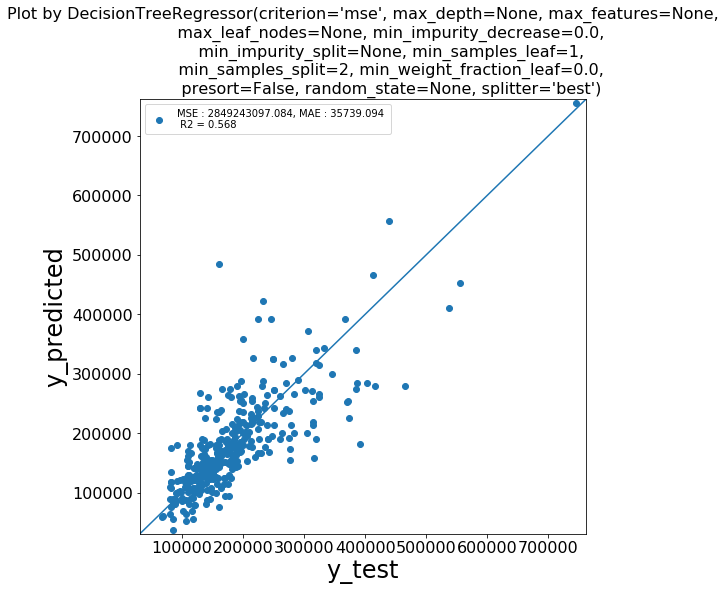

▼RandomForestRegressor
MSE(平均二乗誤差):1871289079.3260753
MAE(平均絶対誤差):28333.015114155252
R2(決定係数):0.7165536709342764


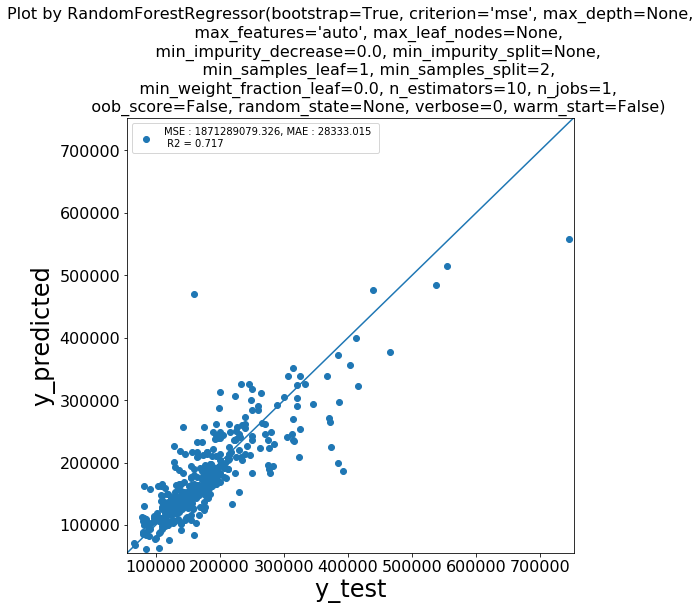

In [34]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

lr = LinearRegression()    # 線形回帰
svm = SVR()    # SVM
dt = DecisionTreeRegressor()   # 決定木
rf = RandomForestRegressor()   # ランダムフォレスト

model_list = [lr, svm, dt, rf]
index_list = ["MSE", "MAE", "R2"]
model_dict = {lr: "LinearRegression", svm: "SVR", dt: "DecisionTreeRegressor", rf: "RandomForestRegressor"}
df_table = pd.DataFrame(np.zeros, index=index_list, columns=model_dict.values())

for model, model_name in model_dict.items():
    print("▼{}".format(model_name))
    df_table[model_name] = regression_analysis(scaler, X_train, X_test, y_train, y_test, model=model)

In [35]:
# 指標値一覧表
display(df_table)

,LinearRegression,SVR,DecisionTreeRegressor,RandomForestRegressor
MSE,2.725908e+09,6.943347e+09,2.849243e+09,1.871289e+09
MAE,3.184433e+04,5.509701e+04,3.573909e+04,2.833302e+04
R2,5.871035e-01,-5.171681e-02,5.684218e-01,7.165537e-01


## 考察
各指標値では、ランダムフォレスト＞線形回帰＞決定木>SVMの順となった。
（ちなみに目的変数「saleprice」を対数変換した時には順序が変わった。これは各学習モデルの特性の問題であるのだろう）

グラフ上もSVMが明らかに予測値がある値で一辺倒になっていることがわかる。
以下セルにてSVMでの予測値を出力、ほぼ同等値であることが確認できた。

課題１のアヤメの分析時は決定木が一番上位だった。決定木は、目的変数が質的変数の場合は得意、量的変数の場合は苦手ということなのか。  
SVMやランダムフォレストはどちらも好成績だった。特徴量変数の数も関係してそうなので、次のアドバンス問題を解きさらに考察を深めたい。

In [12]:
# 以下参考にSVMモデルの予測値y_predを出力してみる

def regression_analysis_svm(scaler, X_train, X_test, y_train, y_test, model):
    scaler.fit(X_train)   #後でスケーリングするために使用する平均と標準を計算します。
    X_train_scaler = scaler.transform(X_train)   # 標準化　センタリングとスケーリングによって標準化を実行する
    X_test_scaler = scaler.transform(X_test)     # 標準化　センタリングとスケーリングによって標準化を実行する
    model.fit(X_train_scaler, y_train)
    y_pred = model.predict(X_test_scaler)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2s = r2_score(y_test, y_pred)
    
    print(y_pred)
    #print("MSE(平均二乗誤差):{}".format(mse))
    #print("MAE(平均絶対誤差):{}".format(mae))
    #print("R2(決定係数):{}".format(r2s))
    
    #yyplot(y_test, y_pred, model)
          
    return [mse, mae, r2s]

regression_analysis_svm(scaler, X_train, X_test, y_train, y_test, model=svm)

[162596.64432774 162391.81073692 162297.35109328 162695.86619017
 162361.51411063 162377.54448719 162708.1570658  162328.45407662
 162527.95526072 162568.91568928 162667.27818143 162621.85352428
 162778.83523925 162315.82340695 162276.47168609 162350.10268511
 162763.19459127 162484.9391991  162369.45007122 162452.27924859
 162354.271266   162501.8657959  162304.80660372 162670.72506105
 162659.64517841 162487.93599138 162727.57487277 162351.31878884
 162766.56043914 162295.46191119 162527.37718065 162751.38974428
 162372.62755482 162753.3198724  162770.51662571 162667.2743324
 162734.91488665 162338.19383117 162769.60803013 162657.96683707
 162568.18182161 162357.15613615 162648.99496544 162781.53415511
 162622.76370273 162549.90234143 162287.54455688 162359.69754592
 162637.83480691 162274.38137885 162646.63407706 162323.97392357
 162488.47794729 162297.91748907 162700.00060125 162333.14046351
 162396.4078814  162779.22403996 162323.82636122 162290.25886888
 162311.51434473 162286.33

[6943346839.259772, 55097.00978181054, -0.051716805682986866]

## 【問題4】（アドバンス課題）他の特徴量も使用しての学習
ここまでは練習のために2つの特徴量だけを使いましたが、他の特徴量を加えるとどのようになるか検証してください。どう選択・加工するかにはデータ分析が重要になってきます。


KaggleのNotebooksも参考にできます。

In [13]:
df = pd.read_csv("train.csv")
df = df.set_index("Id")
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [14]:
df_corr = df.corr().sort_values(by="SalePrice", ascending=False)

df_corr_top10 = df_corr.iloc[:11, :]
df_corr_top10 = df_corr_top10.loc[:, df_corr_top10.index]

display(df_corr_top10)

,SalePrice,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,YearRemodAdd
SalePrice,1.000000,0.790982,0.708624,0.640409,0.623431,0.613581,0.605852,0.560664,0.533723,0.522897,0.507101
OverallQual,0.790982,1.000000,0.593007,0.600671,0.562022,0.537808,0.476224,0.550600,0.427452,0.572323,0.550684
GrLivArea,0.708624,0.593007,1.000000,0.467247,0.468997,0.454868,0.566024,0.630012,0.825489,0.199010,0.287389
GarageCars,0.640409,0.600671,0.467247,1.000000,0.882475,0.434585,0.439317,0.469672,0.362289,0.537850,0.420622
GarageArea,0.623431,0.562022,0.468997,0.882475,1.000000,0.486665,0.489782,0.405656,0.337822,0.478954,0.371600
TotalBsmtSF,0.613581,0.537808,0.454868,0.434585,0.486665,1.000000,0.819530,0.323722,0.285573,0.391452,0.291066
1stFlrSF,0.605852,0.476224,0.566024,0.439317,0.489782,0.819530,1.000000,0.380637,0.409516,0.281986,0.240379
FullBath,0.560664,0.550600,0.630012,0.469672,0.405656,0.323722,0.380637,1.000000,0.554784,0.468271,0.439046
TotRmsAbvGrd,0.533723,0.427452,0.825489,0.362289,0.337822,0.285573,0.409516,0.554784,1.000000,0.095589,0.191740
YearBuilt,0.522897,0.572323,0.199010,0.537850,0.478954,0.391452,0.281986,0.468271,0.095589,1.000000,0.592855


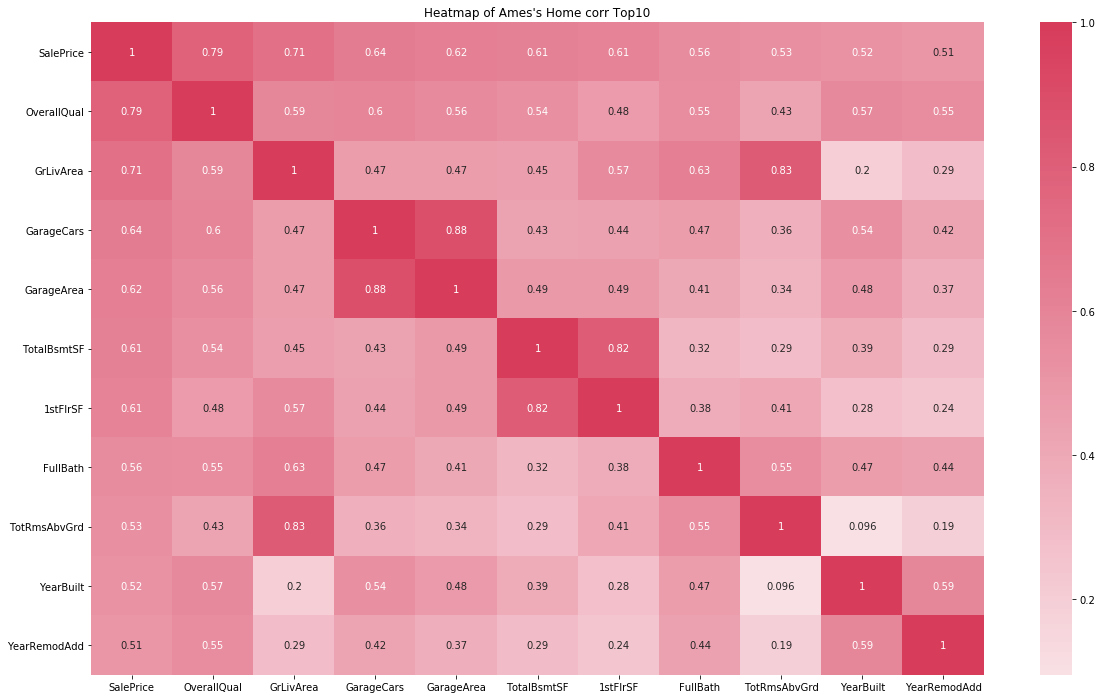

In [15]:
import seaborn as sns

# トップ10のヒートマップ描画
fig, ax = plt.subplots(figsize=(20,12))

ax = sns.heatmap(
    df_corr_top10,
    xticklabels=df_corr_top10.columns,
    yticklabels=df_corr_top10.columns,
    cmap=sns.diverging_palette(250, 5, as_cmap=True),
    center=0,
    annot=True,
    linecolor='white')

ax.set_title("Heatmap of Ames's Home corr Top10")
plt.show()

In [27]:
# トップ10を変数にして学習する
X_1 = pd.DataFrame(df, columns=df_corr_top10.index[1:])
display(X_1.head())
display(y)

display(X_1.shape)
display(y.shape)

,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,YearRemodAdd
Id,,,,,,,,,,
1,7,1710,2,548,856,856,2,8,2003,2003
2,6,1262,2,460,1262,1262,2,6,1976,1976
3,7,1786,2,608,920,920,2,6,2001,2002
4,7,1717,3,642,756,961,1,7,1915,1970
5,8,2198,3,836,1145,1145,2,9,2000,2000


array([208500., 181500., 223500., ..., 266500., 142125., 147500.])

(1460, 10)

(1460,)

In [28]:
# 分割
X_1_train, X_1_test, y_train, y_test =  train_test_split(X_1, y, test_size=0.25, random_state=0)
print(X_1_train.shape)
print(X_1_test.shape)
print(y_train.shape)
print(y_test.shape)

(1095, 10)
(365, 10)
(1095,)
(365,)
[208500. 181500. 223500. ... 266500. 142125. 147500.]


▼LinearRegression
MSE(平均二乗誤差):2130448428.1062043
MAE(平均絶対誤差):24303.111780726165
R2(決定係数):0.6772985035385226


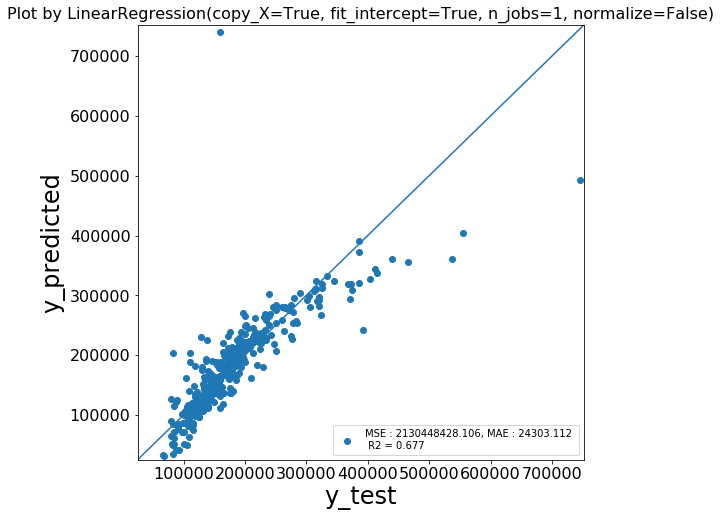

▼SVR
MSE(平均二乗誤差):6952793417.263231
MAE(平均絶対誤差):55137.73956599752
R2(決定係数):-0.05314768981889917


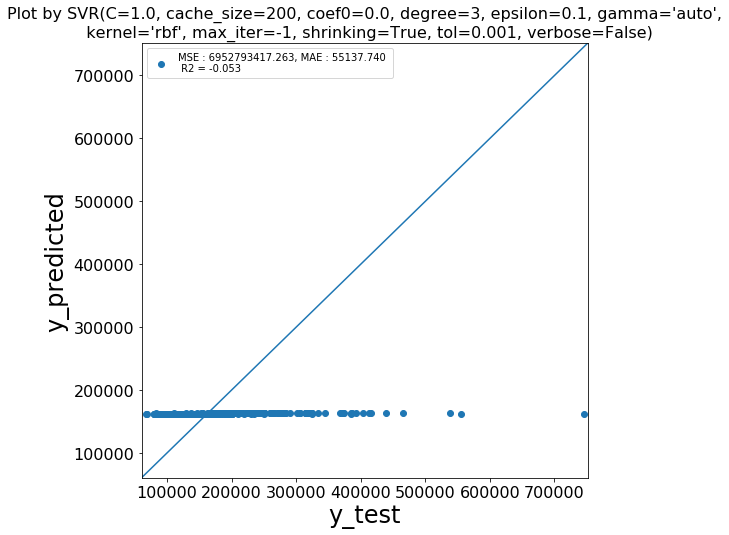

▼DecisionTreeRegressor
MSE(平均二乗誤差):1335645842.852968
MAE(平均絶対誤差):24939.501369863014
R2(決定係数):0.7976881737454957


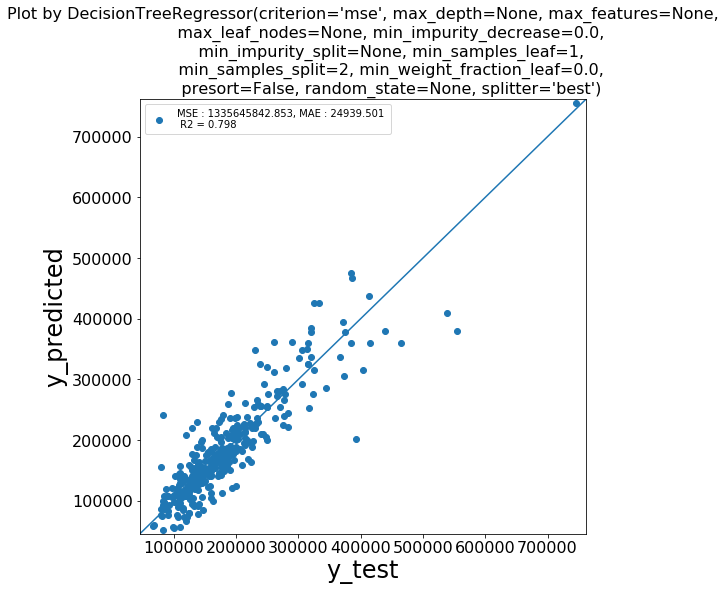

▼RandomForestRegressor
MSE(平均二乗誤差):1038062510.4982436
MAE(平均絶対誤差):20313.715159817348
R2(決定係数):0.8427634665364253


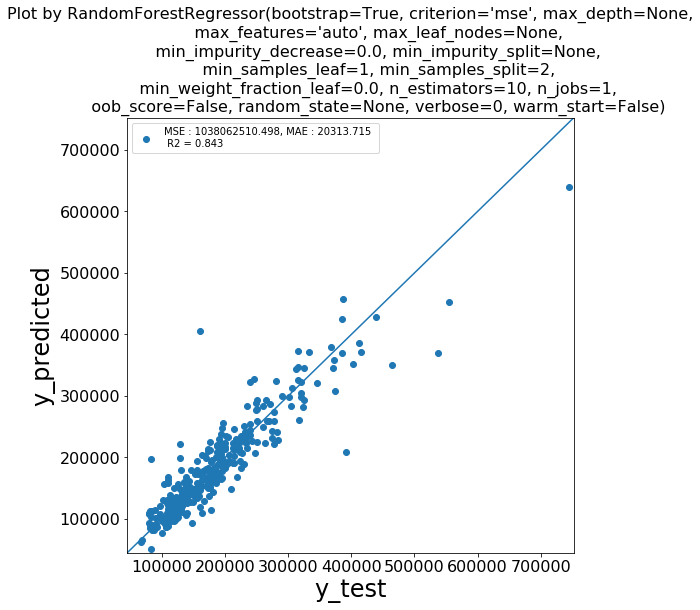

In [50]:
# 全モデルで学習
df_1_table = pd.DataFrame(np.zeros, index=index_list, columns=model_dict.values())

for model, model_name in model_dict.items():
    print("▼{}".format(model_name))
    df_1_table[model_name] = regression_analysis(scaler, X_1_train, X_1_test, y_train, y_test, model=model)

In [44]:
# 指標値一覧表
print("▼変数10個")
display(df_1_table)            # 変数を相関係数の高い10個にしたもの

print()
print("▼変数2個")
display(df_table)               # 比較用（変数GrLivAreaとYearBuiltの2つ）

▼変数10個


,LinearRegression,SVR,DecisionTreeRegressor,RandomForestRegressor
MSE,2.130448e+09,6.952793e+09,1.441250e+09,1.062868e+09
MAE,2.430311e+04,5.513774e+04,2.570890e+04,1.992927e+04
R2,6.772985e-01,-5.314769e-02,7.816922e-01,8.390061e-01



▼変数2個


,LinearRegression,SVR,DecisionTreeRegressor,RandomForestRegressor
MSE,2.725908e+09,6.943347e+09,2.849243e+09,1.871289e+09
MAE,3.184433e+04,5.509701e+04,3.573909e+04,2.833302e+04
R2,5.871035e-01,-5.171681e-02,5.684218e-01,7.165537e-01


## 考察
SVM以外の学習モデルで指標値が大きく伸長した。特に決定木が著しく伸びた。ランダムフォレスト・決定木の決定係数は0.8前後なので、一般的な決定係数数値（0.7以上）と考えるに十分な数値と言える。  
グラフを見ると、いくつか外れ値のようなものが確認できるので、SalePriceの値を対数変換して再度学習させてみる。

In [48]:
y_log = np.log(y)

# 分割
X_1_train, X_1_test, y_log_train, y_log_test =  train_test_split(X_1, y_log, test_size=0.25, random_state=0)
print(X_1_train.shape)
print(X_1_test.shape)
print(y_train.shape)
print(y_test.shape)

(1095, 10)
(365, 10)
(1095,)
(365,)


▼LinearRegression
MSE(平均二乗誤差):0.03880275499184418
MAE(平均絶対誤差):0.10749625810709328
R2(決定係数):0.7390879888286566


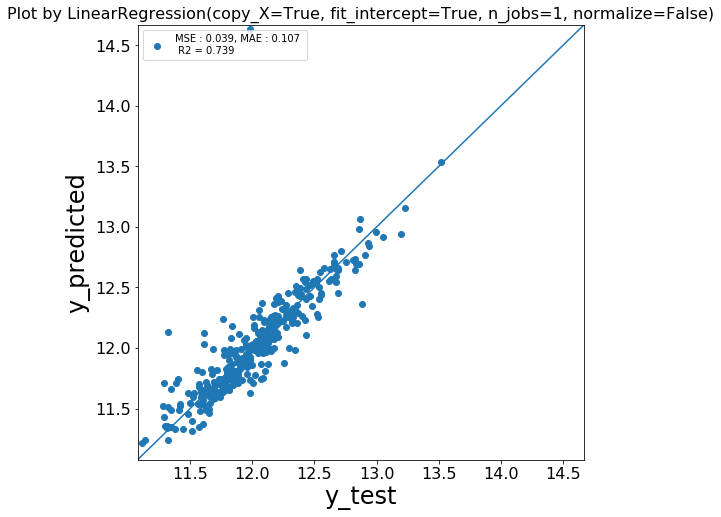

▼SVR
MSE(平均二乗誤差):0.022107648858592083
MAE(平均絶対誤差):0.1056800691956611
R2(決定係数):0.8513468662939654


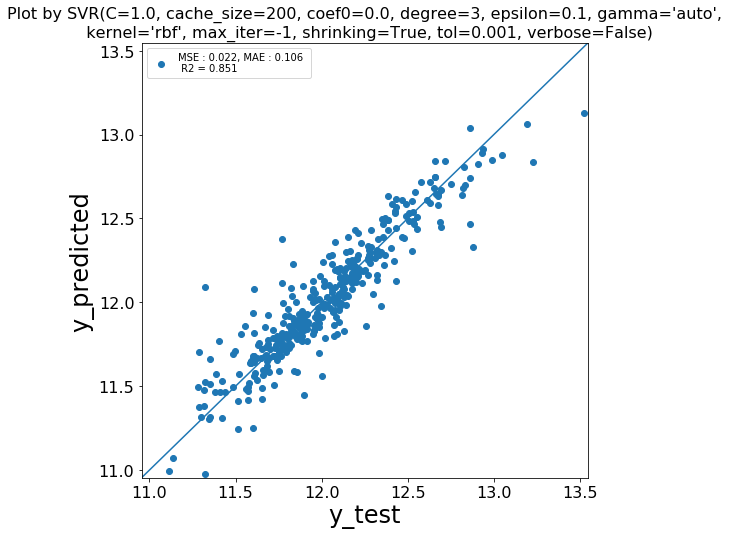

▼DecisionTreeRegressor
MSE(平均二乗誤差):0.051017849527486274
MAE(平均絶対誤差):0.15695166399136468
R2(決定係数):0.6569529733481232


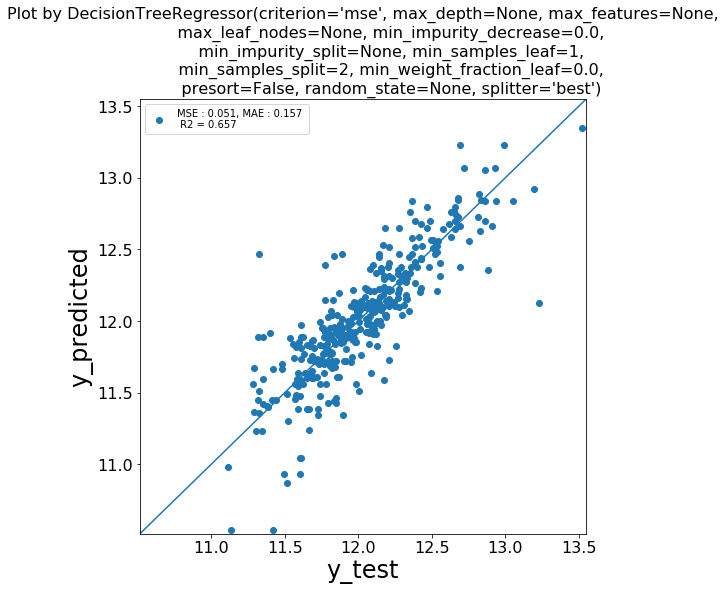

▼RandomForestRegressor
MSE(平均二乗誤差):0.023958584025485348
MAE(平均絶対誤差):0.11416858981607177
R2(決定係数):0.8389010691580817


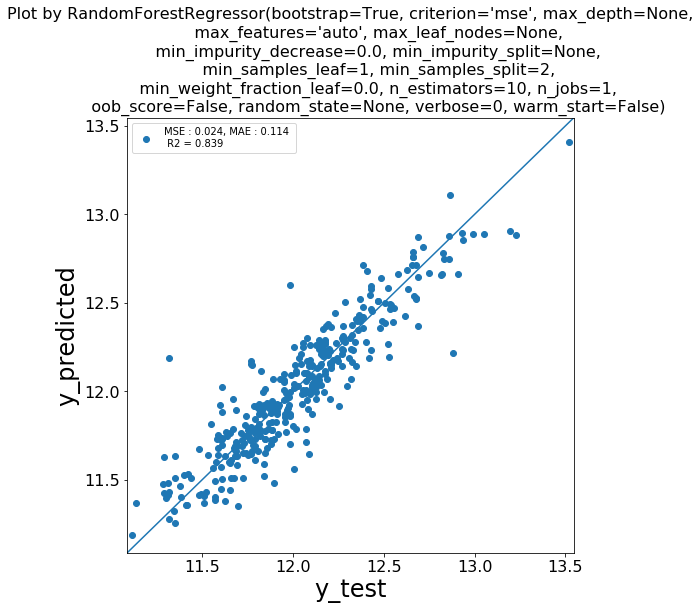

In [52]:
# 全モデルで学習
# 10変数とSalePriceを対数変換したもの
df_log_table = pd.DataFrame(np.zeros, index=index_list, columns=model_dict.values())

for model, model_name in model_dict.items():
    print("▼{}".format(model_name))
    df_log_table[model_name] = regression_analysis(scaler, X_1_train, X_1_test, y_log_train, y_log_test, model=model)

In [53]:
# 指標値一覧表
print("▼変数10個かつSalePriceを対数変換")
display(df_log_table)

print()
print("▼変数10個")
display(df_1_table)            # 変数を相関係数の高い10個にしたもの

print()
print("▼変数2個")
display(df_table)               # 比較用（変数GrLivAreaとYearBuiltの2つ）

▼変数10個かつSalePriceを対数変換


,LinearRegression,SVR,DecisionTreeRegressor,RandomForestRegressor
MSE,0.038803,0.022108,0.051018,0.023959
MAE,0.107496,0.105680,0.156952,0.114169
R2,0.739088,0.851347,0.656953,0.838901



▼変数10個


,LinearRegression,SVR,DecisionTreeRegressor,RandomForestRegressor
MSE,2.130448e+09,6.952793e+09,1.335646e+09,1.038063e+09
MAE,2.430311e+04,5.513774e+04,2.493950e+04,2.031372e+04
R2,6.772985e-01,-5.314769e-02,7.976882e-01,8.427635e-01



▼変数2個


,LinearRegression,SVR,DecisionTreeRegressor,RandomForestRegressor
MSE,2.725908e+09,6.943347e+09,2.849243e+09,1.871289e+09
MAE,3.184433e+04,5.509701e+04,3.573909e+04,2.833302e+04
R2,5.871035e-01,-5.171681e-02,5.684218e-01,7.165537e-01


## 考察3
SVMがベストスコアを叩き出すまで改善された。logで圧縮したことにより、マージンを取得しやすくなったということだと思う。
他の学習モデルは一長一短だった。それぞれのモデルがどういった場合により良いのかなんとなく理解できた課題だった。

## 現在の認識（備忘録）
- 目的変数が量的変数
  - ランダムフォレストが得意（説明変数の数は関係ない）
  - SVMは目的変数もlog化するなどの標準化のようなことをしないと活用できない。

- 説明変数ラベル多いーーーーーーーーーー少ない
  - 決定木　　＞＞＞　　線形回帰　＞＞＞　　SVM




## ▼参考

- https://funatsu-lab.github.io/open-course-ware/basic-theory/accuracy-index/
- https://techacademy.jp/magazine/34209
- https://atarimae.biz/archives/13161